In [1]:
pip install pandas numpy scikit-learn nltk


Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import numpy as np
import re
import nltk
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# Load CSV (after extracting from Kaggle zip)
df = pd.read_csv("twitter_data.csv")
df.head()

,Unnamed: 0,count,hate_speech,offensive_language,neither,class,tweet
0,0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...
1,1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...


In [4]:
print("Shape of dataset:", df.shape)
print(df['class'].value_counts())
df.info()


Shape of dataset: (24783, 7)
class
1    19190
2     4163
0     1430
Name: count, dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24783 entries, 0 to 24782
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Unnamed: 0          24783 non-null  int64 
 1   count               24783 non-null  int64 
 2   hate_speech         24783 non-null  int64 
 3   offensive_language  24783 non-null  int64 
 4   neither             24783 non-null  int64 
 5   class               24783 non-null  int64 
 6   tweet               24783 non-null  object
dtypes: int64(6), object(1)
memory usage: 1.3+ MB


In [5]:
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

def clean_text(text):
    text = text.lower()  # lowercase
    text = re.sub(r'http\S+', '', text)  # remove links
    text = re.sub(r'[^a-zA-Z\s]', '', text)  # remove punctuation/numbers
    text = ' '.join(word for word in text.split() if word not in stop_words)  # remove stopwords
    return text

df['clean_text'] = df['tweet'].apply(clean_text)
df.head()


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\SHAIBA\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


,Unnamed: 0,count,hate_speech,offensive_language,neither,class,tweet,clean_text
0,0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...,rt mayasolovely woman shouldnt complain cleani...
1,1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...,rt mleew boy dats coldtyga dwn bad cuffin dat ...
2,2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...,rt urkindofbrand dawg rt sbabylife ever fuck b...
3,3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...,rt cganderson vivabased look like tranny
4,4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...,rt shenikaroberts shit hear might true might f...


In [6]:
X = df['clean_text']
y = df['class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)


In [7]:
tfidf = TfidfVectorizer(max_features=5000)
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

In [8]:
model = LogisticRegression(max_iter=200)
model.fit(X_train_tfidf, y_train)


LogisticRegression(max_iter=200)

In [9]:
y_pred = model.predict(X_test_tfidf)

print("✅ Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


✅ Accuracy: 0.8931568754034861

Classification Report:
               precision    recall  f1-score   support

           0       0.53      0.16      0.24       361
           1       0.91      0.96      0.94      4794
           2       0.83      0.83      0.83      1041

    accuracy                           0.89      6196
   macro avg       0.76      0.65      0.67      6196
weighted avg       0.88      0.89      0.88      6196



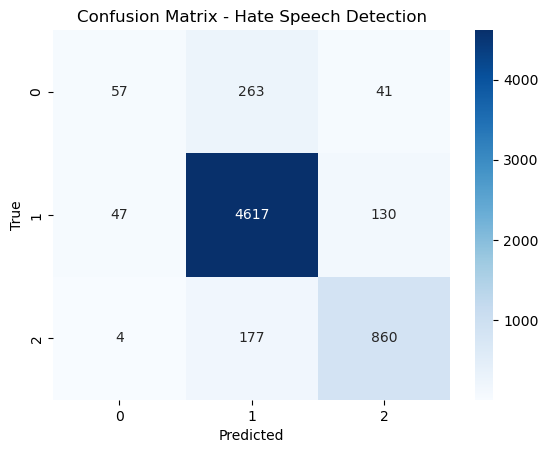

In [10]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix - Hate Speech Detection')
plt.show()


In [11]:
def predict_text(text):
    text = clean_text(text)
    vec = tfidf.transform([text])
    pred = model.predict(vec)[0]
    labels = {0: "Hate Speech 👿", 1: "Offensive 😒", 2: "Normal ✅"}
    return labels[pred]

print(predict_text("I hate these people"))
print(predict_text("You are so dumb"))
print(predict_text("Have a wonderful day!"))


Hate Speech 👿
Offensive 😒
Normal ✅
